In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import np
import cnp
import attention as A


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
import utils
from gp_curves import GPCurvesGenerator

In [4]:
TRAINING_ITERATIONS = int(1e5)
MAX_CONTEXT_POINTS = 10
PLOT_AFTER = int(1e4)

In [5]:
dataset_train = GPCurvesGenerator(batch_size=64, max_size=MAX_CONTEXT_POINTS)
data_train = dataset_train.generate()

In [6]:
dataset_test = GPCurvesGenerator(batch_size=1, max_size=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate()

In [7]:
encoder_output_sizes = [128, 128, 128, 128]
decoder_output_sizes = [128, 128, 1]

model = cnp.ConditionalNP(encoder_output_sizes, decoder_output_sizes)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Iteration: 0, loss: 1.1080090999603271


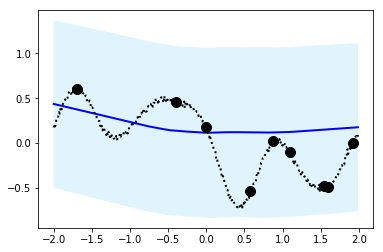

Iteration: 10000, loss: 0.15238936245441437


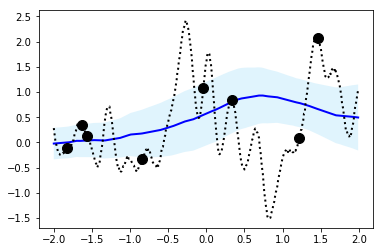

Iteration: 20000, loss: 0.16620542109012604


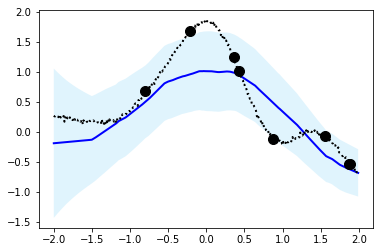

Iteration: 30000, loss: 0.06363032013177872


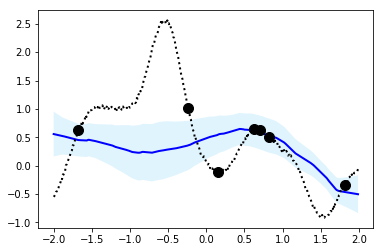

Iteration: 40000, loss: 0.23302751779556274


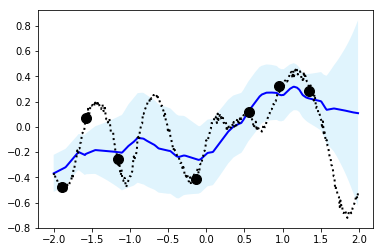

Iteration: 50000, loss: 0.09894948452711105


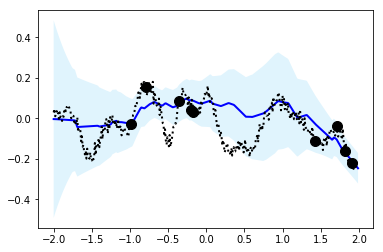

Iteration: 60000, loss: -0.024011701345443726


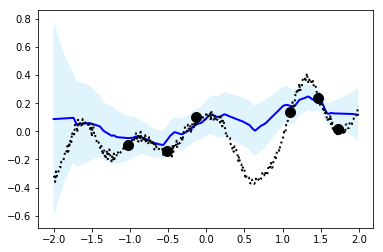

Iteration: 70000, loss: -0.06540647894144058


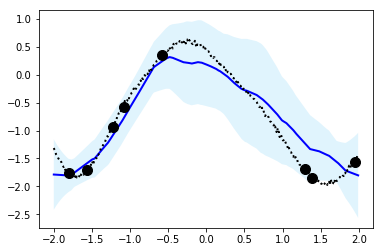

Iteration: 80000, loss: -0.0254218727350235


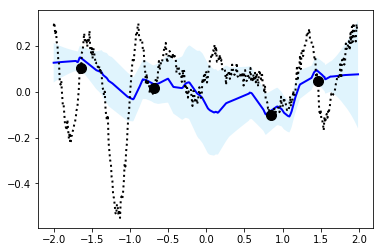

Iteration: 90000, loss: 0.004310131072998047


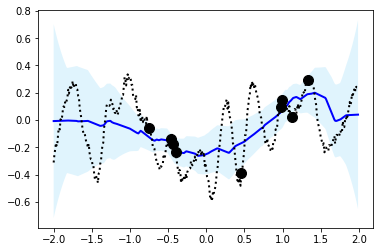

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        sess.run(opt)
        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            utils.plot_func(query, target, cx, cy, pred, var)

In [9]:
hidden_size = 128
latent_encoder_output_sizes = [hidden_size] * 4
num_latents = hidden_size
decoder_output_sizes = [hidden_size] * 2 + [2]
use_deterministic_path = True
deterministic_encoder_output_sizes = [hidden_size] * 4

In [10]:
attention = A.Attention(rep='identity', attention_type='uniform')
model = np.AttentiveNP(latent_encoder_output_sizes,
                       num_latents,
                       decoder_output_sizes,
                       use_deterministic_path,
                       deterministic_encoder_output_sizes,
                       attention)

_, _, log_prob, _, loss = model(data_train.context,
                                data_train.query,
                                data_train.n_target,
                                data_train.target)

mu, sigma, _, _, _ = model(data_test.context,
                           data_test.query,
                           data_test.n_target)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [11]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())

#     for i in range(TRAINING_ITERATIONS):
#         sess.run(opt)
#         if i % PLOT_AFTER == 0:
#             context, query, target, loss_v, pred, var = sess.run([data_test.context,
#                                                                   data_test.query,
#                                                                   data_test.target,
#                                                                   loss, mu, sigma])
#             cx, cy = context
#             print('Iteration: {}, loss: {}'.format(i, loss_v))

#             utils.plot_func(query, target, cx, cy, pred, var)

In [12]:
attention = A.Attention(rep='mlp', attention_type='multihead', mlp_output_sizes=[hidden_size] * 2)
model = np.AttentiveNP(latent_encoder_output_sizes,
                       num_latents,
                       decoder_output_sizes,
                       use_deterministic_path,
                       deterministic_encoder_output_sizes,
                       attention)

_, _, log_prob, _, loss = model(data_train.context,
                                data_train.query,
                                data_train.n_target,
                                data_train.target)

mu, sigma, _, _, _ = model(data_test.context,
                           data_test.query,
                           data_test.n_target)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [13]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())

#     for i in range(TRAINING_ITERATIONS):
#         sess.run(opt)
#         if i % PLOT_AFTER == 0:
#             context, query, target, loss_v, pred, var = sess.run([data_test.context,
#                                                                   data_test.query,
#                                                                   data_test.target,
#                                                                   loss, mu, sigma])
#             cx, cy = context
#             print('Iteration: {}, loss: {}'.format(i, loss_v))

#             utils.plot_func(query, target, cx, cy, pred, var)